# PREDICTING PATIENT MEDICAL APPOINTMENT NO-SHOWS

The objecive of this project is to build a predictive model that uses traditional machine learning algorithms (Logistic Regression), ensemble and stacking algorithms (Random Forest, Decision Trees and XGboost), and deep learning algorithms (LSTM and CNN) to predict the probability of a patient not showing up for a scheduled medical appointment. The dataset used in this project is from Kaggle and contains information from 100k medical appointments in Brazil. 
The dataset includes information such as patient ID, appointment ID, age, sex, scheduled date, appointment date, neighborhood, scholarship, hypertension, diabetes, alcoholism, handicap, SMS received and No-shows (the target variable that shows whether the patient showed up for the appointment or not)


#### 1.1	Background
Healthcare faces some challenges that limit its ability to cater to patients adequately. These include limited access to medical professionals (Soemon Takakuwa and Katagiri 2007), matching patient preferences, wait times, and patients' failure to attend scheduled appointments (Bailey 1952). The problem of appointment no-shows and cancellations is a challenge for healthcare providers, particularly in appointment scheduling systems (AS), as it disrupts the continuity of care for patients (Alaeddini et al. 2011). 
“No-show” refers to a patient missing their medical appointments without any cancellation or prior notification to the health care provider. This means that the appointment slot is wasted as neither the defiant patient nor the other patient can utilise the appointment because the appointment schedule has patients who would not attend (Hanauer and Huang 2014). 
While existing strategies to reduce patient no-shows have shown some effectiveness, patient no-shows remain significantly high. This led researchers to explore mathematical modelling using machine learning algorithms (Chattopadhyay 2013) to predict attendance and improve AS systems (Stubbs et al. 2012). Several no-show prediction models have been proposed using traditional machine learning algorithms like regression, tree, SVM, clustering, and ensemble algorithms, with logistic regression (LR) variants being the most used techniques for modelling binary responses to forecast attendance (Carreras-García et al. 2020). However, in contrast to state-of-the-art approaches for predicting patient no-shows, there is little research exploring the combination of traditional machine learning models and more complex machine learning models, such as gradient boosting algorithms (Lee et al. 2017) and deep learning networks recurrent neural networks (Dashtban and Li 2019).

#### 1.2	Problem Definition
The high rate of patient no-shows is a problem for healthcare as it significantly impacts revenue, costs, resources, and patient health outcomes. Addressing this challenge will optimise healthcare operations and improve patient care. To solve this problem, this research uses machine learning algorithms to predict patient no-shows. By developing and comparing predictive models using traditional machine learning, deep learning RNNs, and gradient-boosting algorithms, this study seeks to identify the most effective approach.

#### Objectives
1.	To investigate the current applications of Machine learning algorithms in medical appointment scheduling and no-show prediction.
2.	To identify factors that influence a patient’s no-show behaviour.
3.	To evaluate the effectiveness of traditional machine learning and deep learning algorithms in forecasting patient appointment no-shows.
4.	To explore and implement data resampling techniques to address the class imbalance in the dataset and enhance the performance of predictive models.
5.	To compare the performance of implemented machine learning and deep learning models to determine the most suitable model for integration into a healthcare appointment scheduling system.


#### Some research questions that will be answered in this project include:
* RQ2: What significant factors contribute to patients missing scheduled medical appointments?
* RQ3: How accurately can the implemented traditional machine learning and deep learning algorithms predict whether a patient will show up for their medical appointment?
* RQ4: What data resampling techniques effectively address the class imbalance issue in the dataset, thereby improving the performance of the predictive models?
* RQ5: Which of the implemented machine learning and deep learning models show superior performance and are most suitable for integration into a healthcare appointment scheduling system?



Some modules used in this project need to be installed before running the code 
Some plot pre-configurations for visualizations are also done as seen below;

In [1040]:
# Data Preprocessing libraries
import pandas as pd
import numpy as np

# Data Visualisation libraries
import matplotlib.pyplot as plt
# import seaborn as sns
import missingno as msno


Some utility functions are defined below to help with the data preprocessing and cleaning.

In [1041]:
# Utility functions for data cleaning

def fill_missing_cols(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fill missing values in the specified columns across dataframe with NaN
    Input: df - pandas dataframe
    Output: df - pandas dataframe with standardized missing values
    """
    new_df = df.copy() 
    for col in new_df.columns:
        new_df[col].replace(['?', ' ', '', '_', '-', 'unknown', 'nan', 'N/A', 'na', None], np.nan, inplace=True)
    return new_df

def check_neg_zero_values(df: pd.DataFrame) -> None:
    """
    Check for negative and zero values in the dataframe
    Input: df - pandas dataframe
    Output: None
    """
    for col in df.columns:
        if df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
            print(f"Column: {col}")
            print(f"Negative values: {df[df[col] < 0].shape[0]}")
            print(f"Zero values: {df[df[col] == 0].shape[0]}")
            print("\n")

def visualise_missing_data(df: pd.DataFrame) -> None:
    """
    Visualise missing data in the dataframe
    Input: df - pandas dataframe
    Output: None
    """
    # missing_data = df.isnull().sum()
    # missing_data = missing_data[missing_data > 0]
    # missing_data.sort_values(inplace=True)
    # missing_data.plot.bar()
    
    # Visualise missing data using missingno library
    msno.matrix(df)
    msno.bar(df)
    msno.heatmap(df)
    msno.dendrogram(df)
    plt.show()
    
    # plt.figure(figsize=(6, 6))
    # sns.heatmap(df.isna(), cbar=False, cmap='viridis')
    # plt.show()
    
def drop_missing_data(df: pd.DataFrame, threshold: float = 0.5) -> pd.DataFrame:
    """
    Drop columns with missing values greater than the threshold
    Input: df - pandas dataframe
           threshold - float value to specify the threshold for missing values
    Output: df - pandas dataframe with columns dropped
    """
    new_df = df.copy()
    new_df.dropna(axis=1, thresh=threshold*len(new_df), inplace=True)
    return new_df

def select_numerical_series(df:pd.DataFrame, include_counts:bool=False) -> pd.Series:
    numeric:pd.Series = df.select_dtypes(["int16","int64","float16","float64"])
    if not include_counts:
        return df.select_dtypes(["int16","int64","float16","float64"])
    # print(select_numerical_series(appointment_df,True))
    return numeric, len(numeric.columns.to_list())

def select_categorical_series(df:pd.DataFrame, include_counts:bool=False) -> pd.Series:
    categorical:pd.Series = df.select_dtypes(["object"])
    if not include_counts:
        return df.select_dtypes(["object"])
    # print(select_categorical_series(appointment_df,True))
    return categorical, len(categorical.columns.to_list())

def get_outliers (df:pd.DataFrame, col:str, ascending: bool = False) -> pd.DataFrame:
    """
    Get the outliers in the specified column
    Input: df - pandas dataframe
           col - column name
           ascending - boolean value to specify the order of the outliers
    Output: df - pandas dataframe with outliers
    """
    # check if the columns is numerical
    if df[col].dtype not in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        print(f"Column {col} is not numerical")
        return None
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    # return outliers with count 
    return outliers


def plot_outliers(df: pd.DataFrame):
    """
    Plot a distribution of outliers across all columns in the dataframe
    Input: df - pandas dataframe
    Output: None (plots the distribution)
    """
    # Create an empty dictionary to store outlier counts for each column
    outlier_counts = {}

    # Iterate over each column in the dataframe
    for col in df.columns:
        # Check if the column is numerical
        if df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
            # Calculate quartiles and IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Find outliers
            outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
            
            # Store the count of outliers for the column
            outlier_counts[col] = len(outliers)

    # Plot the distribution of outliers
    plt.bar(outlier_counts.keys(), outlier_counts.values())
    plt.xlabel('Columns')
    plt.ylabel('Number of Outliers')
    plt.title('Distribution of Outliers Across Columns')
    plt.xticks(rotation=45)
    plt.show()
    
def rename_columns_lwr(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rename columns to lowercase
    Input: df - pandas dataframe
    Output: df - pandas dataframe with columns renamed to lowercase
    """
    new_df = df.copy()
    new_df.columns = new_df.columns.str.lower()
    return new_df

Loading Dataset

In [1044]:
data_df = pd.read_csv("data/medical_appointments.csv")

In [1045]:
# create a copy of the dataframe
appointment_df = data_df.copy()

### 1. Data Examination

I have created a copy of the original dataset to work with and I will load the dataset and display the first few rows to understand the structure of the dataset.

I will also have also have a look at the appointment dataset and inspect its attributes, columns, and data types.

In [1046]:
appointment_df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1047]:
# Dataset Dimensions
appointment_df.shape

(110527, 14)

In [1048]:
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The appointment dataset contains 14 feature variables and 110527 observations of type float, integer and object. The variables are as follows:

patientid: This column contains unique identifiers for each patient. It is represented in scientific notation (e.g., 2.987250e+13) and is likely stored as a numerical data type, such as float or integer.

AppointmentID: Similar to PatientID, this column contains unique identifiers for each appointment. It is also represented in scientific notation and stored as a numerical data type.

Gender: Represents the gender of the patient (e.g., 'F' for female, 'M' for male). It is stored as a categorical data type, typically either string or character.

ScheduledDay: Indicates the date and time the appointment was scheduled. The data type is likely datetime, storing both date and time information.

AppointmentDay: Represents the date of the appointment. Like ScheduledDay, it is stored as a datetime data type.

Age: Indicates the age of the patient. It is stored as a numerical data type, likely integer.

Neighbourhood: Denotes the neighborhood where the appointment takes place. It is stored as a categorical data type, typically string or character.

Scholarship: Indicates whether the patient receives financial aid. It is stored as a binary categorical variable (0 for no, 1 for yes).

Hypertension: Represents whether the patient has hypertension (0 for no, 1 for yes). It is stored as a binary categorical variable.

Diabetes: Indicates whether the patient has diabetes (0 for no, 1 for yes). It is stored as a binary categorical variable.

Alcoholism: Denotes whether the patient is an alcoholic (0 for no, 1 for yes). It is stored as a binary categorical variable.

Handicap: Indicates whether the patient has a handicap (0-4 for the degree of handicap). It is stored as a numerical.

SMS_received: Represents whether the patient received an SMS reminder for the appointment (0 for no, 1 for yes). It is stored as a binary categorical variable.

No-show: Denotes whether the patient showed up for the appointment (‘No’ for showed up, ‘Yes’ for did not show up). It is stored as a categorical variable, typically string or character.

In [1049]:
appointment_df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### OBSERVATIONS
Some of the columns in the dataset are stored as numerical data types, such as integer or float, while others are stored as categorical data types, such as string or character. The target variable, No-show, is a categorical variable that indicates whether the patient showed up for the appointment. The dataset contains a mix of numerical and categorical features, which may require different preprocessing steps before building a predictive model. 

### 2. DATA CLEANING AND PREPROCESSING

In [1050]:
# rename columns to lowercase
appointment_df = rename_columns_lwr(appointment_df)

In [1051]:
# Change patient ID to string
appointment_df["patientid"] = appointment_df["patientid"].astype(str)

Encode Target Variable (No-Show) column

The No-show column is the target variable, which will be used to predict whether a patient will show up for an appointment. It is a binary categorical variable that will be later encoded as 0 for 'No' (showed up) and 1 for 'Yes' (did not show up).
Also the date columns ScheduledDay and AppointmentDay appear among the categorical variables due to incorrect data type. They will be changed consequently to the correct format

In [1052]:
# Change the values in the No-show column to 0 and 1 for No and Yes respectively making it binary
# appointment_df["no-show"] = appointment_df["no-show"].apply(lambda x: 0 if x == "no" else 1)

appointment_df["no-show"] = np.where(appointment_df["no-show"] == "No", 0, 1)

In [1053]:
# Check for missing/null values
print(appointment_df.isnull().sum())

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no-show           0
dtype: int64


In [1054]:
# check for duplicate rows 
print(appointment_df.duplicated().sum())

0


There are no duplicate rows in the dataset, which is a good sign that the data is clean and does not contain any redundant information. The dataset contains 110527 rows and 14 columns, which is consistent with the original dataset. The data types of the columns are also consistent with the original dataset, with the exception of the ScheduledDay and AppointmentDay columns, which wil be converted to datetime data types.

c:\Users\ktamu\OneDrive\Desktop\Coursework\Masters_Dissertation\venv\lib\site-packages\missingno\missingno.py:264: RuntimeWarning: overflow encountered in scalar multiply
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
c:\Users\ktamu\OneDrive\Desktop\Coursework\Masters_Dissertation\venv\lib\site-packages\missingno\missingno.py:271: RuntimeWarning: overflow encountered in scalar multiply
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)
c:\Users\ktamu\OneDrive\Desktop\Coursework\Masters_Dissertation\venv\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\ktamu\OneDrive\Desktop\Coursework\Masters_Dissertation\venv\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformatio

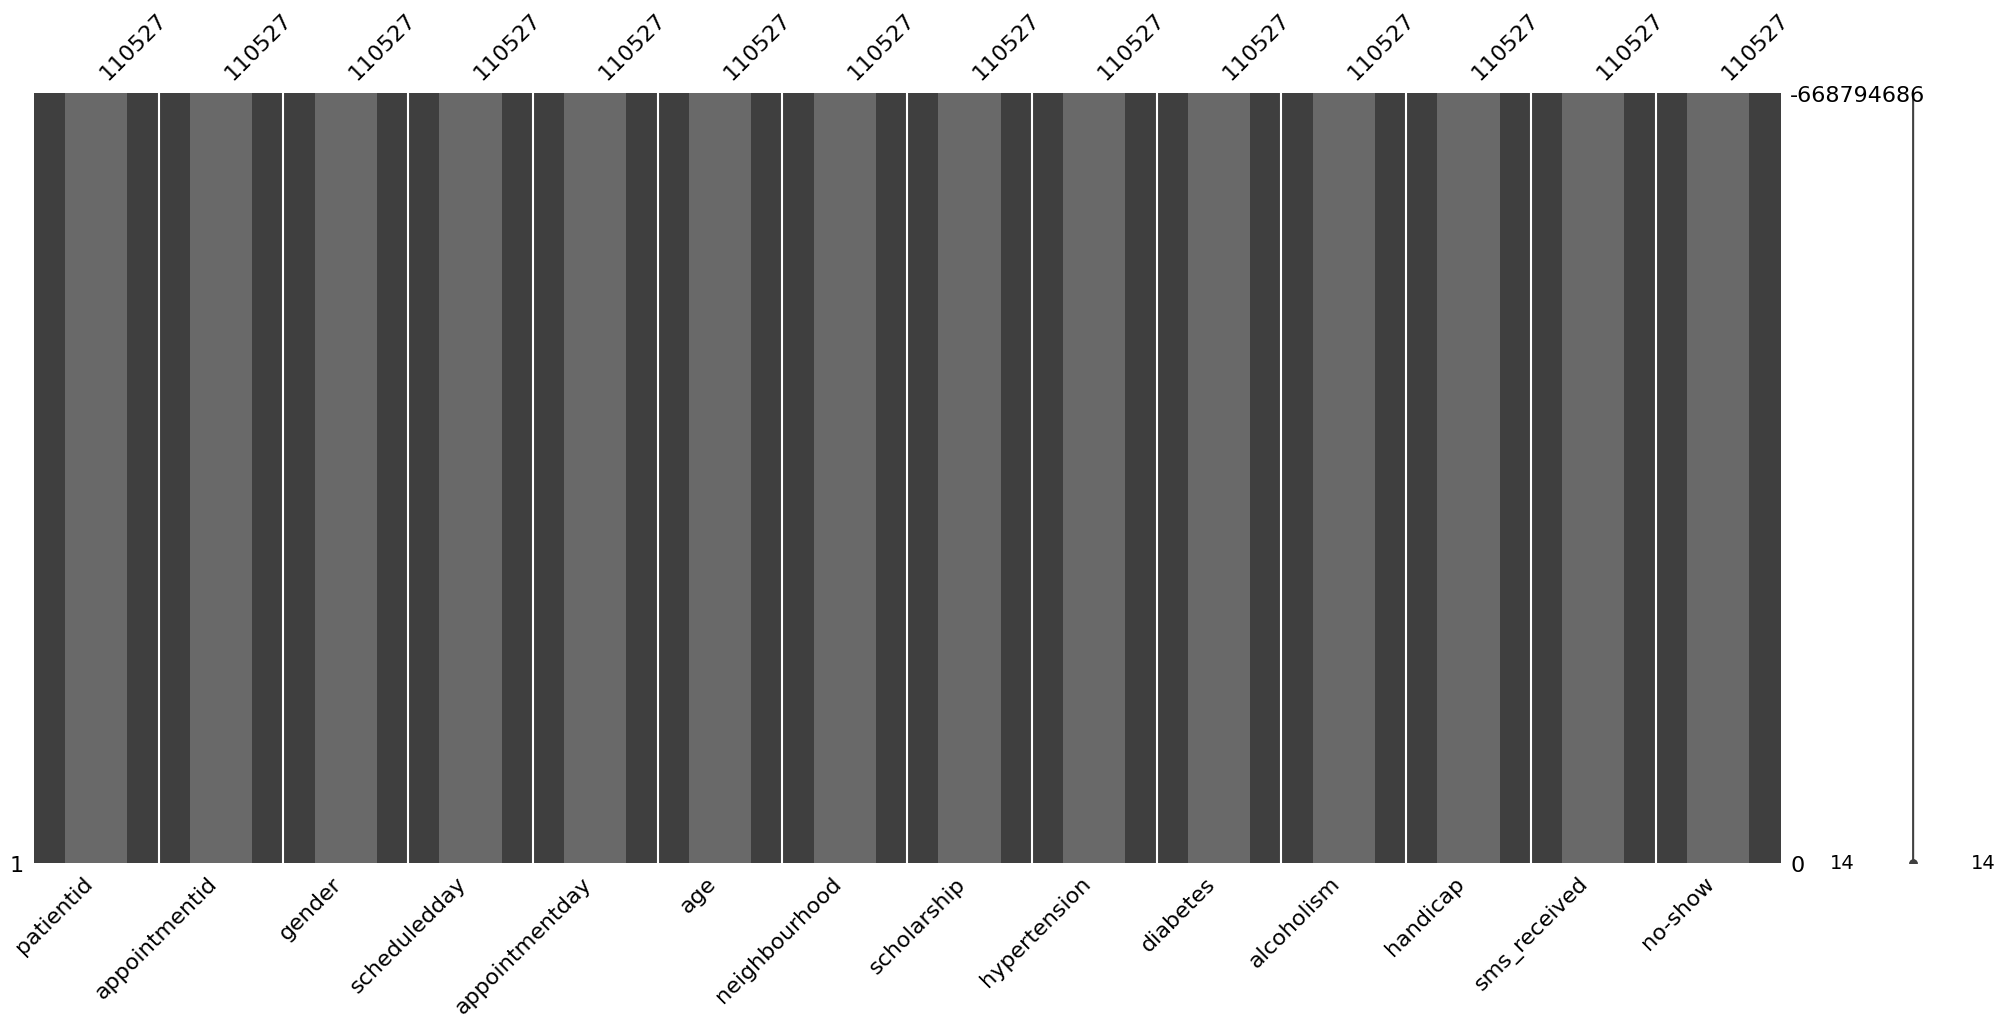

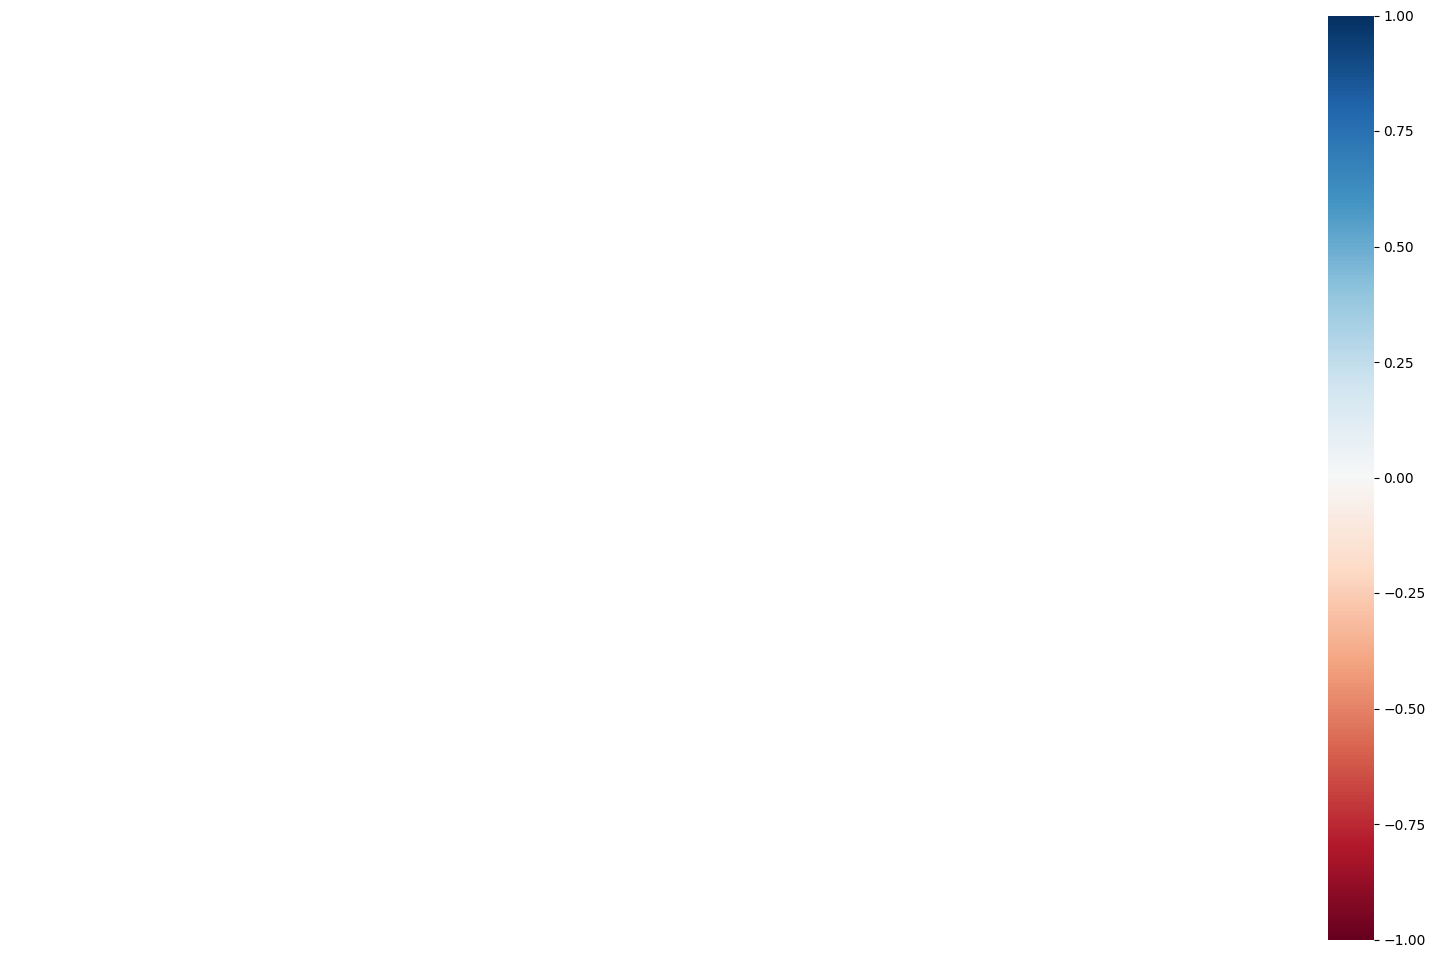

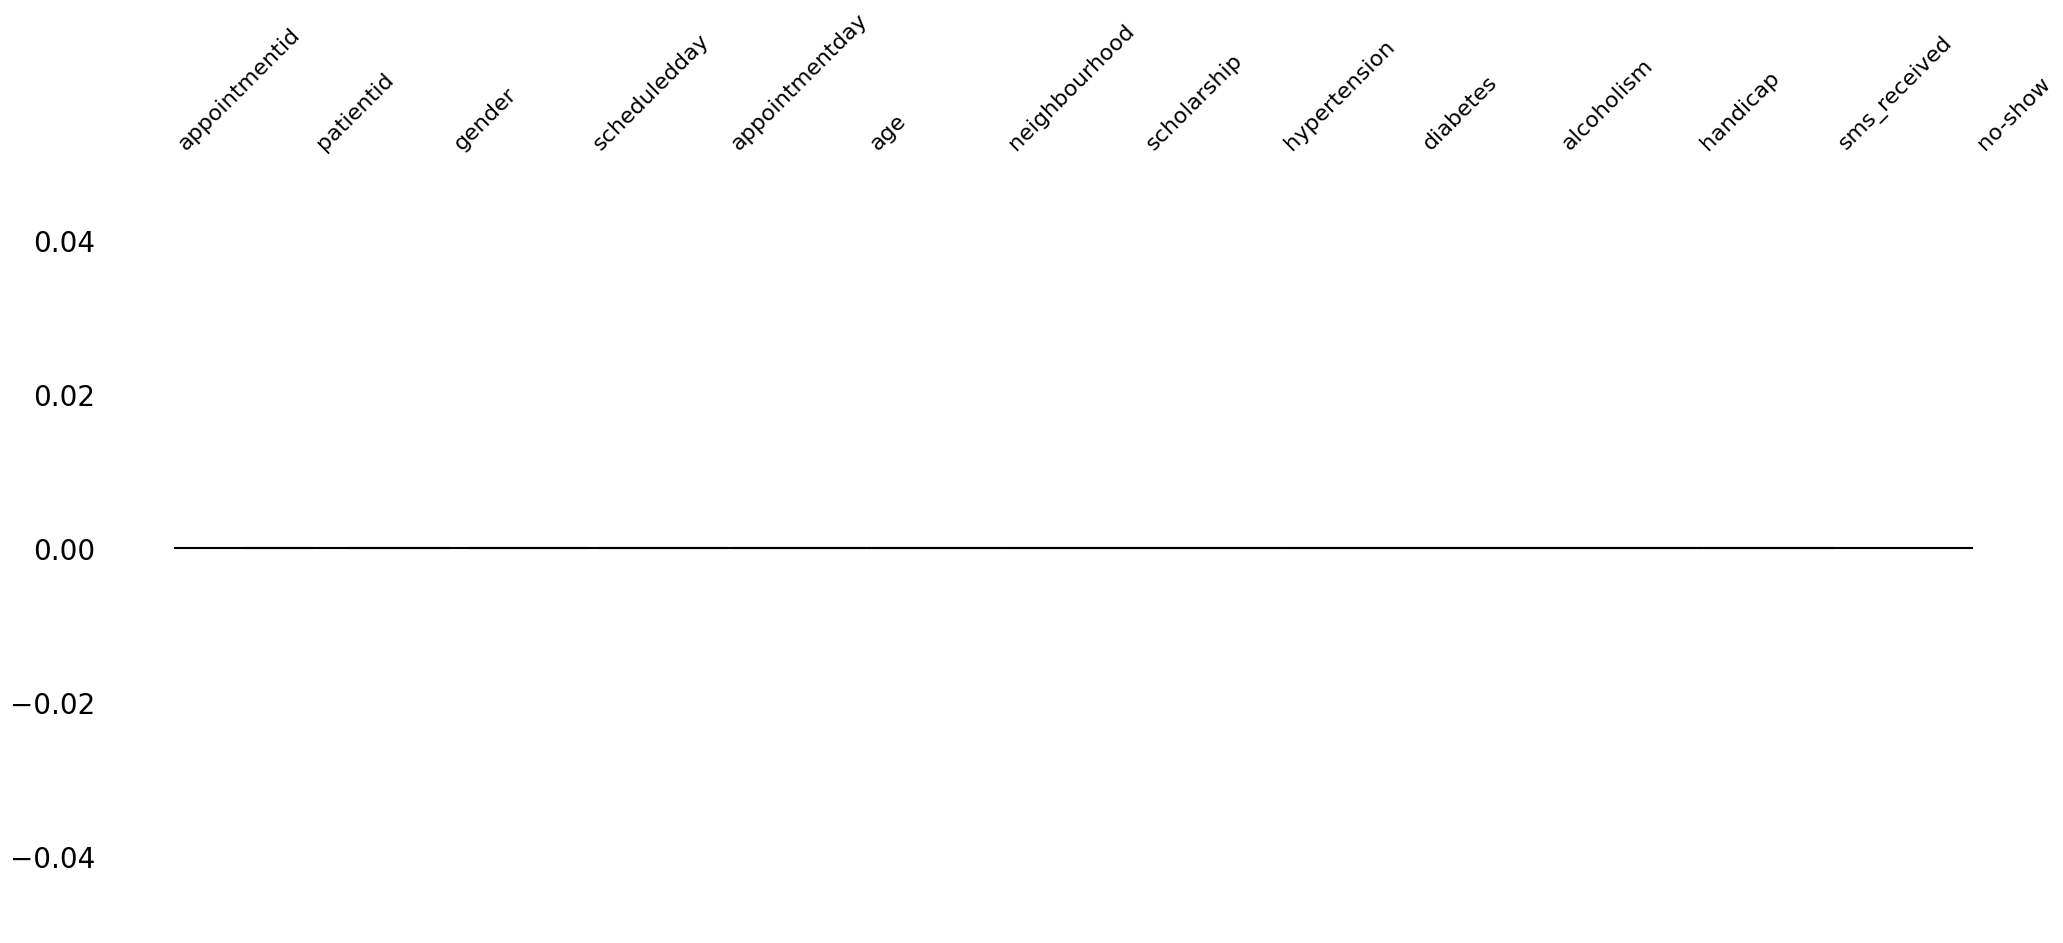

In [1055]:
# visualise missing data
visualise_missing_data(appointment_df)

Missing Values: 

The dataset shows that there are no missing values in any of the columns. However, the data types of some columns may need to be adjusted to better reflect the nature of the data. For example, PatientID and AppointmentID should be stored as strings or characters, while ScheduledDay and AppointmentDay should be stored as datetime objects.

In [1056]:
# Show the number of unique values in each column
print(appointment_df.nunique())

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no-show                2
dtype: int64


The distribution of unique values for each feature variable in the dataset is shown above to help identify potential issues, such as missing values or outliers especially in binary and categorical variables like Scholarship, gender, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, and No-show that should have only two unique values (0 and 1) or M and F.
The distribution of values across the dataset columns show that there are some outliers in the Age column. The minimum age is -1, which is not possible. The maximum age is 115, which is possible but may be an outlier. The Handicap column also contains values greater than 1, which is not expected. These outliers will be addressed in the data cleaning process.

In [1057]:
# shows the number of values across all the columns in the dataset
for c in appointment_df.columns:
    print(appointment_df[c].value_counts())

patientid
822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
6264198675331.0      62
                     ..
862263621811.0        1
9267587227475.0       1
5764355598913.0       1
5712491287569.0       1
15576631729893.0      1
Name: count, Length: 62299, dtype: int64
appointmentid
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: count, Length: 110527, dtype: int64
gender
F    71840
M    38687
Name: count, dtype: int64


scheduledday
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: count, Length: 103549, dtype: int64
appointmentday
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    

The dataset also contains some categorical variables that need to be encoded for analysis

In [1058]:
# This is the number of unique patients in the dataset who have booked an appointment
len(appointment_df["patientid"].value_counts())

62299

In [1059]:
# Check the number of patients in the dataset who have more than one appointment
print("patientid: ", appointment_df["patientid"].duplicated().sum())
print("appointmentid:", appointment_df["appointmentid"].duplicated().sum())

patientid:  48228
appointmentid: 0


In [1060]:
# Check for the number of appointments in the dataset
print(f"There are {len(appointment_df['appointmentid'].value_counts())} individual appointments in the dataset")
# Check for the number of unique patients in the dataset who have booked an appointment and show the percentage of patients who have booked more than one appointment
print(f"Out of the {len(appointment_df['appointmentid'].value_counts())} appointments, there are {len(appointment_df['patientid'].value_counts())} individual patients who have booked a single appointment and {appointment_df['patientid'].duplicated().sum()} patients who have booked more than one appointment.\nThis means that {round((appointment_df.shape[0] - len(appointment_df['patientid'].value_counts()))/appointment_df.shape[0]*100, 2)}% of patients have booked more than one appointment.")

There are 110527 individual appointments in the dataset
Out of the 110527 appointments, there are 62299 individual patients who have booked a single appointment and 48228 patients who have booked more than one appointment.
This means that 43.63% of patients have booked more than one appointment.


In [1061]:
# select and view all numerical columns in the dataset
numerical_df = select_numerical_series(appointment_df)
numerical_df.head()

,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
0,5642903,62,0,1,0,0,0,0
1,5642503,56,0,0,0,0,0,0
2,5642549,62,0,0,0,0,0,0
3,5642828,8,0,0,0,0,0,0
4,5642494,56,0,1,1,0,0,0


In [1062]:
# check for outliers in the numerical columns
print("Total number of outliers in the Age column: ", get_outliers(appointment_df, "age").shape[0])
print("Total number of outliers in the Scholarship column: ", get_outliers(appointment_df, "scholarship").shape[0])
print("Total number of outliers in the Hypertension column: ", get_outliers(appointment_df, "hypertension").shape[0])
print("Total number of outliers in the Diabetes column: ", get_outliers(appointment_df, "diabetes").shape[0])
print("Total number of outliers in the Alcoholism column: ", get_outliers(appointment_df, "alcoholism").shape[0])
print("Total number of outliers in the Handicap column: ", get_outliers(appointment_df, "handicap").shape[0])
print("Total number of outliers in the SMS_received column: ", get_outliers(appointment_df, "sms_received").shape[0])


Total number of outliers in the Age column:  5
Total number of outliers in the Scholarship column:  10861
Total number of outliers in the Hypertension column:  21801
Total number of outliers in the Diabetes column:  7943
Total number of outliers in the Alcoholism column:  3360
Total number of outliers in the Handicap column:  2241
Total number of outliers in the SMS_received column:  0


The only outlier correctly represented is the age feature which is numerical, the rest are categorical hence invalid to have outliers.

In [1064]:
# Check for negative and zero values in the Age column and negative values in the other numerical columns
check_neg_zero_values(appointment_df)

Column: appointmentid
Negative values: 0
Zero values: 0


Column: age
Negative values: 1
Zero values: 3539


Column: scholarship
Negative values: 0
Zero values: 99666


Column: hypertension
Negative values: 0
Zero values: 88726


Column: diabetes
Negative values: 0
Zero values: 102584


Column: alcoholism
Negative values: 0
Zero values: 107167


Column: handicap
Negative values: 0
Zero values: 108286


Column: sms_received
Negative values: 0
Zero values: 75045


Column: no-show
Negative values: 0
Zero values: 88208




The only column where the negative and zero are significant is the Age column as there are some negative values and zero age values. All other columns with numerical values are binary with positive values (0 and 1) respectively

In [1065]:
#view all categorical columns
categorical_df = select_categorical_series(appointment_df)
categorical_df.head()

,patientid,gender,scheduledday,appointmentday,neighbourhood
0,29872499824296.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,JARDIM DA PENHA
1,558997776694438.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,JARDIM DA PENHA
2,4262962299951.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,MATA DA PRAIA
3,867951213174.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,PONTAL DE CAMBURI
4,8841186448183.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,JARDIM DA PENHA


In [1066]:
# Explore the age distribution of the patients
print(appointment_df["age"].describe())

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


There are 3539 patients with zero age values and 1 patient with negative age values in the dataset. These will be removed as it is not possible to have a negative age or zero age

In [1067]:
# Drop the rows with wrong values for the age 
appointment_df.drop(appointment_df[appointment_df["age"] <= 0].index, inplace=True)

In [1068]:
# Average age of patients
print(f"The average age of patients in the dataset is {round(appointment_df['age'].mean(), 2)} years")

The average age of patients in the dataset is 38.32 years


### CLEAN UP THE DATE COLUMNS AND FORMATS

The ScheduledDay and AppointmentDay columns for hours:minutes:seconds are 00:00:00 which gives no time value for hours, minutes and seconds. 
The data type of both date columns will be modified from object("string") to datetime suitable for manipulation and analysis. 
Both date columns will also be set to the same format for uniformity, easy manipulation and analysis.

In [1069]:
# Exlpore the date columns in the dataset
print(appointment_df["scheduledday"].head())
print(appointment_df["appointmentday"].head())

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: scheduledday, dtype: object
0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: appointmentday, dtype: object


In [1070]:
# Remove the hours, minutes and seconds from the date columns for uniformity
appointment_df["scheduledday"] = appointment_df["scheduledday"].apply(lambda x: x.split("T")[0])
appointment_df["appointmentday"] = appointment_df["appointmentday"].apply(lambda x: x.split("T")[0])

# Change the AppointmentDay and ScheduledDay columns to datetime data type from object
appointment_df["scheduledday"] = pd.to_datetime(appointment_df["scheduledday"])
appointment_df["appointmentday"] = pd.to_datetime(appointment_df["appointmentday"])

# Normalize the colums to remove the hours, minutes and seconds
appointment_df["scheduledday"] = appointment_df["scheduledday"].dt.normalize()
appointment_df["appointmentday"] = appointment_df["appointmentday"].dt.normalize()

To ensure the operations to convert the date columns to datetime format are successful, the date columns will be checked for any missing values and the data types of the columns will be checked to ensure they are in the correct format.

In [1071]:
# check the data types of the date columns 
print(appointment_df[["scheduledday", "appointmentday"]].dtypes)

scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
dtype: object


In [1072]:
# Add a new column to the dataset to show the day of the week for the appointment for further analysis
appointment_df["weekday"] = appointment_df["appointmentday"].dt.day_name()

appointment_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,weekday
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


In [1073]:
# The date columns have been changed to datetime data type
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106987 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       106987 non-null  object        
 1   appointmentid   106987 non-null  int64         
 2   gender          106987 non-null  object        
 3   scheduledday    106987 non-null  datetime64[ns]
 4   appointmentday  106987 non-null  datetime64[ns]
 5   age             106987 non-null  int64         
 6   neighbourhood   106987 non-null  object        
 7   scholarship     106987 non-null  int64         
 8   hypertension    106987 non-null  int64         
 9   diabetes        106987 non-null  int64         
 10  alcoholism      106987 non-null  int64         
 11  handicap        106987 non-null  int64         
 12  sms_received    106987 non-null  int64         
 13  no-show         106987 non-null  int32         
 14  weekday         106987 non-null  object  

In [1074]:
# Check for the total number of days for the appointments in the dataset
print(f"The total number of days for the appointments in the dataset is {max(appointment_df['appointmentday']) - min(appointment_df['appointmentday'])}days")

The total number of days for the appointments in the dataset is 40 days 00:00:00days


In [1075]:
# Check the range of date for the appointments in the dataset from first day to last day
print(f"The range of date for the appointments in the dataset is from {min(appointment_df['scheduledday'])} to {max(appointment_df['scheduledday'])}")
print(f"This is a total of {max(appointment_df['scheduledday']) - min(appointment_df['scheduledday'])} days")

The range of date for the appointments in the dataset is from 2015-11-10 00:00:00 to 2016-06-08 00:00:00
This is a total of 211 days 00:00:00 days


The appointment dataset has appointments recorded for 40 days starting from 2016-04-29 to 2016-06-08 covering 211 days

In [1076]:
# View the type of the patient ID column
appointment_df["patientid"].describe()

count                106987
unique                60270
top       822145925426128.0
freq                     88
Name: patientid, dtype: object

Wait Time: The wait time between the scheduled day and the appointment day will be calculated and added as a new feature (Column) to the dataset. The wait time will be calculated in days and will be used to determine if the wait time has an impact on the patient's likelihood of showing up for the appointment.

In [1077]:
# Add a new column "waitime" to the dataset to show the number of days between the scheduled day and the appointment day
# This will help to determine the appointment waiting time/lead time for the patients for later analysis

appointment_df["waittime"] = appointment_df["appointmentday"] - appointment_df["scheduledday"]
# Store the date values as days in the new column
appointment_df["waittime"] = appointment_df["waittime"].dt.days

I will view the dataset to confirm that the "waititme" column is added to it as this will help in understanding the relationship between the number of days between the scheduled day and the appointment day and the no-show status of the patient.

In [1078]:
appointment_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,weekday,waittime
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,0
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,0
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,0


In [1079]:
appointment_df["waittime"].describe()

count    106987.000000
mean         10.166721
std          15.263508
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: waittime, dtype: float64

This shows that there are some appointments that were scheduled after the appointment day resulting in negative waittime. This is not possible and will be removed from the dataset as it gives a wrong representation of the data showing negative wait time.

In [1080]:
# check for the number of Negative values in the WaitTime column (i.e. appointments that were scheduled after the appointment day)
# Check for the rows where the waiting time is negative (Scenarios where the appointment day is before the scheduled day)

np.sum(appointment_df["waittime"] < 0)
appointment_df.waittime[appointment_df["waittime"] < 0].value_counts()

waittime
-1    4
-6    1
Name: count, dtype: int64

There are 5 rows where the waiting time is negative. These rows will be removed from the dataset later on for better analysis

In [1081]:
# drop the rows where the waiting time is negative
appointment_df.drop(appointment_df[appointment_df["waittime"] < 0].index, inplace=True)

Appointment count: The number of appointments scheduled for each patient will be calculated and added as a new feature (appointmentcount) to the dataset as this will help in understanding the relationship between the number of appointments scheduled for a patient and the no-show status of the patient.

In [1085]:
# Add the number of Appointments for each patient to the dataset
appointment_df["appointmentcount"] = appointment_df["patientid"].map(appointment_df["patientid"].value_counts())


In [1086]:
appointment_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,weekday,waittime,appointmentcount
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0,2
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0,2
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,0,2
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,0,2
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,0,1


HANDICAP COLUMN:
The only useful handicap values are 0 and 1 which means the patient is not handicapped or is handicapped respectively. The other values i.e 2,3,4 showing range of handicap are not useful and will be changed to 1 to show that the patient is handicapped.

In [1087]:
# Check for patients with handicap values greater than 1
np.sum(appointment_df["handicap"] > 1)

199

In [1088]:
# show all the unique values in the handicap column
print(appointment_df["handicap"].unique())

[0 1 2 3 4]


In [1089]:
# set all patient with handicap value greater than 1 to 1
appointment_df["handicap"] = appointment_df["handicap"].apply(lambda x: 1 if x > 1 else x)

In [1090]:
# Filter the 'appointment_df' dataframe to show appontments that were scheduled before the appointment day#
print(f'{appointment_df[appointment_df["waittime"] > 0].shape[0]} apointments were scheduled before the appointment day')

69828 apointments were scheduled before the appointment day


In [1091]:
# check for waiting days equal to zero (i.e. same day appointments)
print(f'{appointment_df[appointment_df["waittime"] == 0].shape[0]} appointments were scheduled on the same day as the appointment day')

37154 appointments were scheduled on the same day as the appointment day


To shows that the cleaning operations were succesfull, the dataset will be displayed to show the changes made to the columns

In [1092]:
print(f"Before cleaning and preprocessing the dataset {data_df.shape}")
print(f"After cleaning and preprocessing the dataset {appointment_df.shape}")

Before cleaning and preprocessing the dataset (110527, 14)
After cleaning and preprocessing the dataset (106982, 17)


The dataset has been cleaned and preprocessed and is now ready for analysis and modeling. They are a total of 69828 appointments scheduled before the appointment day and 37154 appointments scheduled on the same day as the appointment day, giving a total of 106982 appointments for analysis. The cleaned dataset will saved as a new csv file for further analysis and modeling

In [1093]:
appointment_df.to_csv("data/cleaned_medical_appointments.csv", index=False)